Compute the ratio of current decomposition at kappa = 0 and kappa = 0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/post_analysis/analysis_classes")
from dynamics_analysis import nonequilibrium_analysis

In [2]:
noneq = nonequilibrium_analysis()
dirs = ["h_1.15","h_2.25","h_3.15"]
path = "/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/formal_run/epR_1e3"
path_extra = "/home/ggu7596/project/optimal_control/motorsim_double_track/toy_model_v2/formal_run/epR_1e3/extra_simulation_points"
num_repeat = 20
strengths = ['0', '0.1']
k_attach_right_FTCs = ["0.002","0.02"]
r_r_bead = np.zeros((len(dirs),len(k_attach_right_FTCs),len(strengths),2))
r_l_bead = np.zeros((len(dirs),len(k_attach_right_FTCs),len(strengths),2))
for k,dir in enumerate(dirs):
    for i, k_f in enumerate(k_attach_right_FTCs):
        for j,strength in enumerate(strengths):
            sub_path = path +"/"+dir+"/k_attach_far_" +str(k_f)+"/coupling_strength_"+strength
            r_r_bead[k,i,j,0],r_r_bead[k,i,j,1],r_l_bead[k,i,j,0],r_l_bead[k,i,j,1] = noneq.hopping_rates(sub_path)

In [3]:
# extra points for low fueling rate data
k_attach_right_FTCs_extra = ["0.00002","0.0002"]
r_r_bead_extra = np.zeros((len(dirs),len(k_attach_right_FTCs_extra),len(strengths),num_repeat,2))
r_l_bead_extra = np.zeros((len(dirs),len(k_attach_right_FTCs_extra),len(strengths),num_repeat,2))
for k,dir in enumerate(dirs):
    print("dir = "+dir)
    for i, k_f in enumerate(k_attach_right_FTCs_extra):
        for j,strength in enumerate(strengths):
            for l in range(1,num_repeat+1):
                sub_path = path_extra +"/"+dir+"/k_attach_far_" +str(k_f)+"/coupling_strength_"+strength+"/repeat_"+str(l)
                r_r_bead_extra[k,i,j,l-1,0],r_r_bead_extra[k,i,j,l-1,1],r_l_bead_extra[k,i,j,l-1,0],r_l_bead_extra[k,i,j,l-1,1] = noneq.hopping_rates(sub_path)


dir = h_1.15
dir = h_2.25
dir = h_3.15


In [4]:
# compute the average hopping rates over the repeats
r_r_bead_avg = np.mean(r_r_bead_extra,axis=3)
r_l_bead_avg = np.mean(r_l_bead_extra,axis=3)
r_r_bead_avg[:,:,:,1] =np.mean(r_r_bead_extra[:,:,:,:,1],axis=3)/np.sqrt(num_repeat)
r_l_bead_avg[:,:,:,1] =np.mean(r_l_bead_extra[:,:,:,:,1],axis=3)/np.sqrt(num_repeat)

In [5]:
# combine r_r_bead and r_r_bead_avg
r_r_bead_combined = np.concatenate((r_r_bead_avg,r_r_bead),axis=1)
r_l_bead_combined = np.concatenate((r_l_bead_avg,r_l_bead),axis=1)

In [6]:
def current_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    return (r_r_mean-r_l_mean),(r_r_err+r_l_err)
def activity_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    return (r_r_mean+r_l_mean),(r_r_err+r_l_err)
def bias_(r_r_mean, r_r_err, r_l_mean, r_l_err):
    bias = (r_r_mean-r_l_mean)/(r_r_mean+r_l_mean)
    bias_err = 2 / (r_r_mean + r_l_mean)**2 * np.sqrt((r_l_mean * r_r_err)**2 + (r_r_mean * r_l_err)**2)
    return bias, bias_err

In [7]:
def plot_activity_bias_current(k_attach_right_FTCs,r_r_bead,r_l_bead):
    activity, activity_err = activity_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    bias, bias_err = bias_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    current, current_err = current_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])

    fig, ax = plt.subplots(1,3,figsize=(12,5))
    ax[0].errorbar(np.float64(k_attach_right_FTCs),activity[:,0],yerr=activity_err[:,0],fmt='o-',label="strength = 0",color='blue')
    ax[0].errorbar(np.float64(k_attach_right_FTCs),activity[:,1],yerr=activity_err[:,1],fmt='o-',label="strength = 0.1",color='red')
    ax[1].errorbar(np.float64(k_attach_right_FTCs),bias[:,0],yerr=bias_err[:,0],fmt='o-',label="strength = 0",color='blue')
    ax[1].errorbar(np.float64(k_attach_right_FTCs),bias[:,1],yerr=bias_err[:,1],fmt='o-',label="strength = 0.1",color='red')
    ax[2].errorbar(np.float64(k_attach_right_FTCs),current[:,0],yerr=current_err[:,0],fmt='o-',label="strength = 0",color='blue')
    ax[2].errorbar(np.float64(k_attach_right_FTCs),current[:,1],yerr=current_err[:,1],fmt='o-',label="strength = 0.1",color='red')
    ax[0].set_ylabel("Activity")
    ax[1].set_ylabel("Bias")
    ax[2].set_ylabel("Current")
    ax[0].set_xlabel("k_attach_far")
    ax[1].set_xlabel("k_attach_far")
    ax[2].set_xlabel("k_attach_far")
    ax[0].legend()
    ax[0].set_ylim(0,10e-4)
    ax[0].set_xscale('log')
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    plt.tight_layout()
    plt.show()

In [8]:
for i in range(len(dirs)):
    r_r_bead = r_r_bead_combined[i]
    r_l_bead = r_l_bead_combined[i]
    activity, activity_err = activity_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1]) 
    bias, bias_err = bias_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    current, current_err = current_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])

    current = np.array([current[:,0],current[:,1]])* np.sqrt(2)
    current_err = np.array([current_err[:,0],current_err[:,1]])* np.sqrt(2)
    bias = np.array([bias[:,0],bias[:,1]])
    bias_err = np.array([bias_err[:,0],bias_err[:,1]])
    activity = np.array([activity[:,0],activity[:,1]])* np.sqrt(2)
    activity_err = np.array([activity_err[:,0],activity_err[:,1]])* np.sqrt(2)
    data_path = "/home/ggu7596/project/optimal_control/motorsim_double_track/post_process/coupled_motor_paper/paper_data/FigS8"
    np.savetxt(data_path+"/activity_"+str(dirs[i])+".txt",activity)
    np.savetxt(data_path+"/activity_err_"+str(dirs[i])+".txt",activity_err)
    np.savetxt(data_path+"/bias_"+str(dirs[i])+".txt",bias)
    np.savetxt(data_path+"/bias_err_"+str(dirs[i])+".txt",bias_err)
    np.savetxt(data_path+"/current_"+str(dirs[i])+".txt",current)
    np.savetxt(data_path+"/current_err_"+str(dirs[i])+".txt",current_err)


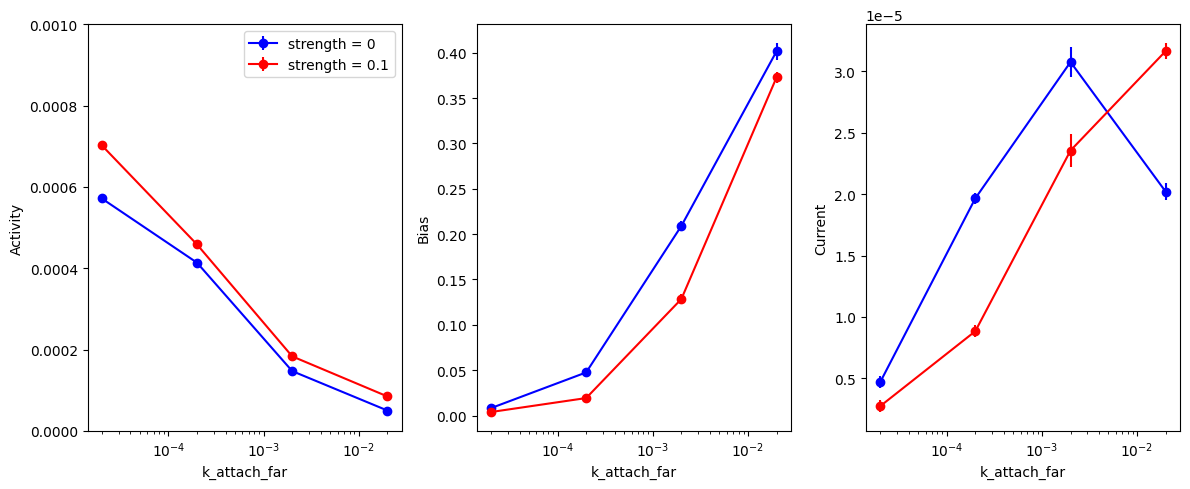

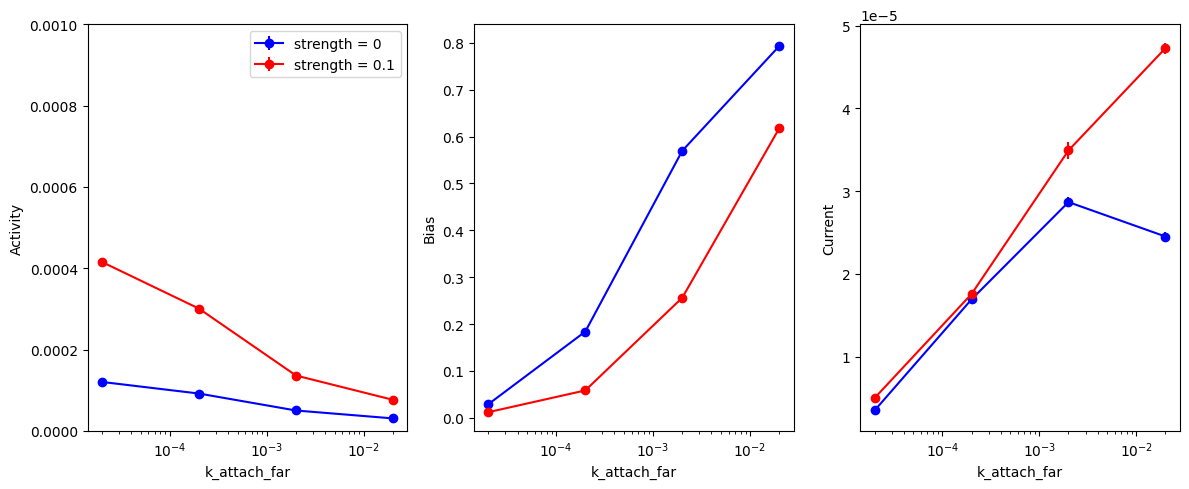

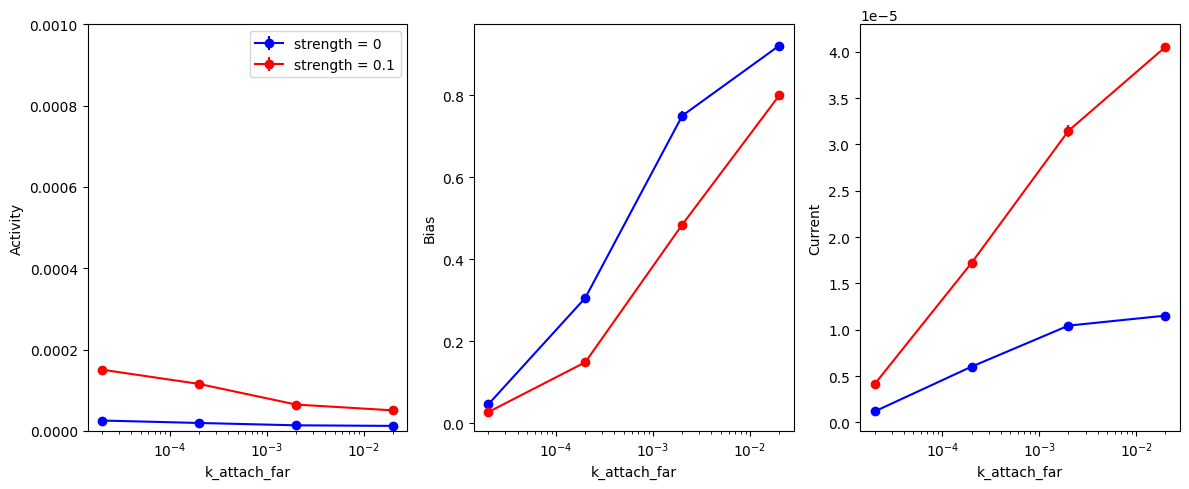

In [8]:
k_attach_right_FTCs_full = ["0.00002","0.0002","0.002","0.02"]
for i,dir in enumerate(dirs):
    plot_activity_bias_current(k_attach_right_FTCs_full,r_r_bead_combined[i],r_l_bead_combined[i])


In [30]:
def activity_bias_current( r_r_bead,r_l_bead):
    activity, activity_err = activity_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    bias, bias_err = bias_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    current, current_err = current_(r_r_bead[:,:,0], r_r_bead[:,:,1], r_l_bead[:,:,0], r_l_bead[:,:,1])
    # Ratio of activity and bias, and current
    return activity, bias, current, activity_err, bias_err, current_err

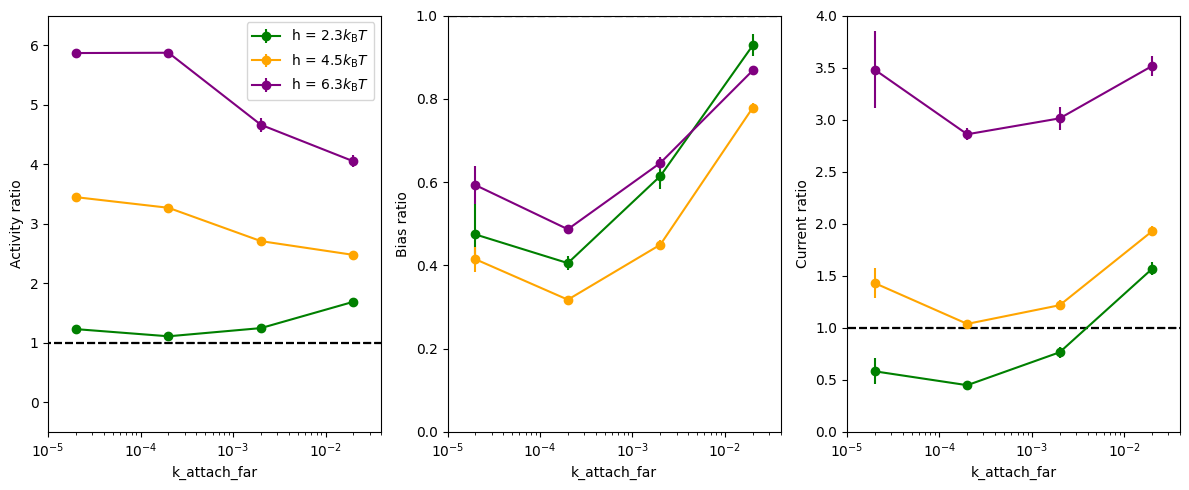

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
colors = ['green','orange','purple']
for i,dir in enumerate(dirs):
    activity, bias, current, activity_err, bias_err, current_err = activity_bias_current(r_r_bead_combined[i],r_l_bead_combined[i])
    ax[0].errorbar(np.float64(k_attach_right_FTCs_full),activity[:,1]/activity[:,0],yerr=np.abs(activity[:,1]/activity[:,0])*np.sqrt((activity_err[:,1]/activity[:,1])**2+(activity_err[:,0]/activity[:,0])**2),fmt='o-',color=colors[i],label = 'h = '+str(float(dir.split('_')[-1])*2)+r"$k_\mathrm{B}T$")
    ax[0].set_ylabel("Activity ratio")
    ax[1].errorbar(np.float64(k_attach_right_FTCs_full),bias[:,1]/bias[:,0],yerr=np.abs(bias[:,1]/bias[:,0])*np.sqrt((bias_err[:,1]/bias[:,1])**2+(bias_err[:,0]/bias[:,0])**2),fmt='o-',color=colors[i])
    ax[1].set_ylabel("Bias ratio")
    ax[2].errorbar(np.float64(k_attach_right_FTCs_full),current[:,1]/current[:,0],yerr=np.abs(current[:,1]/current[:,0])*np.sqrt((current_err[:,1]/current[:,1])**2+(current_err[:,0]/current[:,0])**2),fmt='o-',color=colors[i])
    ax[0].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[1].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[2].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[2].set_ylabel("Current ratio")
    ax[0].set_xlabel("k_attach_far")
    ax[1].set_xlabel("k_attach_far")
    ax[2].set_xlabel("k_attach_far")
    ax[0].set_xscale('log')
    ax[0].set_ylim(-0.5,6.5)
    ax[1].set_ylim(0,1)
    ax[2].set_ylim(0,4)
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[0].set_xlim(0.00002/2,0.04)
    ax[1].set_xlim(0.00002/2,0.04)
    ax[2].set_xlim(0.00002/2,0.04)
ax[0].legend()
plt.tight_layout()
plt.show()

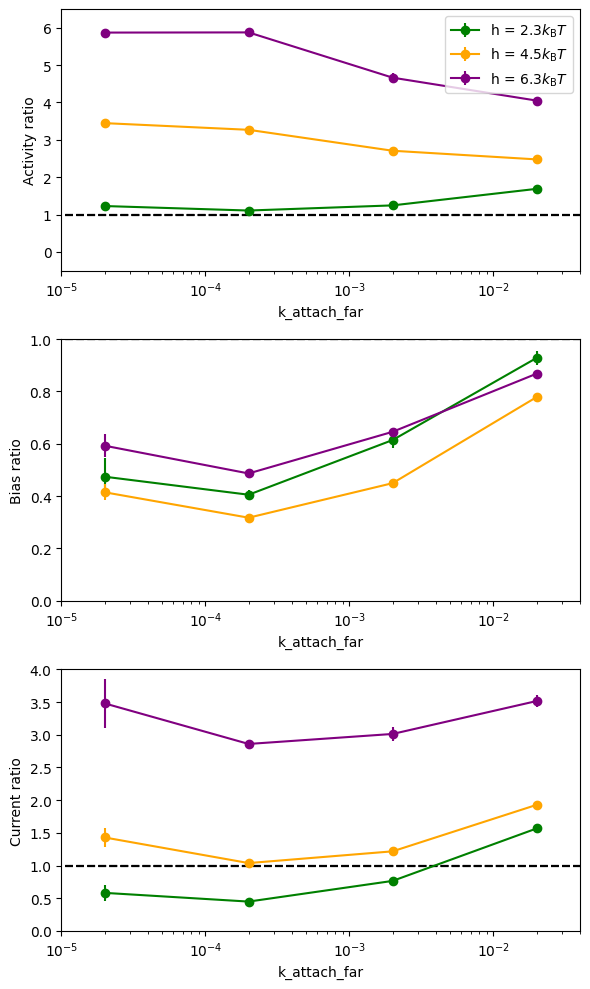

In [ ]:
# compute the activity, bias, and current ratio
fig, ax = plt.subplots(3,1,figsize=(6,10))
activity_ratio = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
bias_ratio = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
current_ratio = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
activity_ratio_err = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
bias_ratio_err = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
current_ratio_err = np.zeros((len(dirs),len(k_attach_right_FTCs_full)))
for i,dir in enumerate(dirs):
    activity, bias, current, activity_err, bias_err, current_err = activity_bias_current(r_r_bead_combined[i],r_l_bead_combined[i])
    activity_ratio[i,:] = activity[:,1]/activity[:,0]
    activity_ratio_err[i,:] = np.abs(activity[:,1]/activity[:,0])*np.sqrt((activity_err[:,1]/activity[:,1])**2+(activity_err[:,0]/activity[:,0])**2)
    bias_ratio[i,:] = bias[:,1]/bias[:,0]
    bias_ratio_err[i,:] = np.abs(bias[:,1]/bias[:,0])*np.sqrt((bias_err[:,1]/bias[:,1])**2+(bias_err[:,0]/bias[:,0])**2)
    current_ratio[i,:] = current[:,1]/current[:,0]
    current_ratio_err[i,:] = np.abs(current[:,1]/current[:,0])*np.sqrt((current_err[:,1]/current[:,1])**2+(current_err[:,0]/current[:,0])**2)
    
    ax[0].errorbar(np.float64(k_attach_right_FTCs_full),activity_ratio[i,:],yerr=activity_ratio_err[i,:],fmt='o-',color=colors[i],label = 'h = '+str(float(dir.split('_')[-1])*2)+r"$k_\mathrm{B}T$")
    ax[0].set_ylabel("Activity ratio")
    ax[1].errorbar(np.float64(k_attach_right_FTCs_full),bias_ratio[i,:],yerr=bias_ratio_err[i,:],fmt='o-',color=colors[i])
    ax[1].set_ylabel("Bias ratio")
    ax[2].errorbar(np.float64(k_attach_right_FTCs_full),current_ratio[i,:],yerr=current_ratio_err[i,:],fmt='o-',color=colors[i])
    ax[0].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[1].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[2].hlines(1,0.000002,0.2,color='black',linestyle='--')
    ax[2].set_ylabel("Current ratio")
    ax[0].set_xlabel("k_attach_far")
    ax[1].set_xlabel("k_attach_far")
    ax[2].set_xlabel("k_attach_far")
    ax[0].set_xscale('log')
    ax[0].set_ylim(-0.5,6.5)
    ax[1].set_ylim(0,1)
    ax[2].set_ylim(0,4)
    ax[1].set_xscale('log')
    ax[2].set_xscale('log')
    ax[0].set_xlim(0.00002/2,0.04)
    ax[1].set_xlim(0.00002/2,0.04)
    ax[2].set_xlim(0.00002/2,0.04)
ax[0].legend()
plt.tight_layout()
plt.show()


In [18]:
# save the data
data_path = "/home/ggu7596/project/optimal_control/motorsim_double_track/post_process/coupled_motor_paper/paper_data/Fig4"
np.savetxt(data_path+"/activity_ratio.txt",activity_ratio)
np.savetxt(data_path+"/activity_ratio_err.txt",activity_ratio_err)
np.savetxt(data_path+"/bias_ratio.txt",bias_ratio)
np.savetxt(data_path+"/bias_ratio_err.txt",bias_ratio_err)
np.savetxt(data_path+"/current_ratio.txt",current_ratio)
np.savetxt(data_path+"/current_ratio_err.txt",current_ratio_err)

In [19]:
# Compare the current, activity, and bias with MD simulation
sys.path.append("/home/ggu7596/project/optimal_control/motorsim_double_track/post_process/analysis_classes")
from MD_analysis import equilibrium_analysis as MD_neq_analysis

In [20]:
MD_neq = MD_neq_analysis()

In [21]:
pathLow = "/home/ggu7596/project/optimal_control/motorsim_double_track/data/week12year2025/Double_track_spring_simulation_very_low_bind_affinity/nonequilibrium/offset/0_0"
pathMedium = "/home/daa1393/motorsim_double_track/jobs/spring_jobs/neq_offset_jobs/str_1"
pathHigh = "/home/ggu7596/project/optimal_control/motorsim_double_track/data/week44year2024/Double_track_spring_simulation_high_bind_affinity/nonequilibrium/offset/0_0"
path_array = [pathLow,pathMedium,pathHigh]

In [23]:
functions = [MD_neq.hopping_rates,MD_neq.hopping_rates_drew,MD_neq.hopping_rates]
colors = ["red","blue","purple"]
r_r_MD = np.zeros((len(path_array)))
r_r_MD_err = np.zeros((len(path_array)))
r_l_MD = np.zeros((len(path_array)))
r_l_MD_err = np.zeros((len(path_array)))
for i,(subpath,function) in enumerate(zip(path_array,functions)):
    r_r_mean,r_r_err,r_l_mean,r_l_err = function(subpath)
    r_r_MD[i] = r_r_mean
    r_r_MD_err[i] = r_r_err
    r_l_MD[i] = r_l_mean
    r_l_MD_err[i] = r_l_err




In [24]:
# compute the activity, bias, and current from MD hopping rates
activity_MD, activity_MD_err = activity_(r_r_MD,r_r_MD_err,r_l_MD,r_l_MD_err)
bias_MD, bias_MD_err = bias_(r_r_MD,r_r_MD_err,r_l_MD,r_l_MD_err)
current_MD, current_MD_err = current_(r_r_MD,r_r_MD_err,r_l_MD,r_l_MD_err)

In [32]:
r_r_JD = r_r_bead_combined[:,1,0,0]
r_r_JD_err = r_r_bead_combined[:,1,0,1]
r_l_JD = r_l_bead_combined[:,1,0,0]
r_l_JD_err = r_l_bead_combined[:,1,0,1]
activity_JD, activity_JD_err = activity_(r_r_JD, r_r_JD_err, r_l_JD, r_l_JD_err)
bias_JD, bias_JD_err = bias_(r_r_JD, r_r_JD_err, r_l_JD, r_l_JD_err)
current_JD, current_JD_err = current_(r_r_JD, r_r_JD_err, r_l_JD, r_l_JD_err)


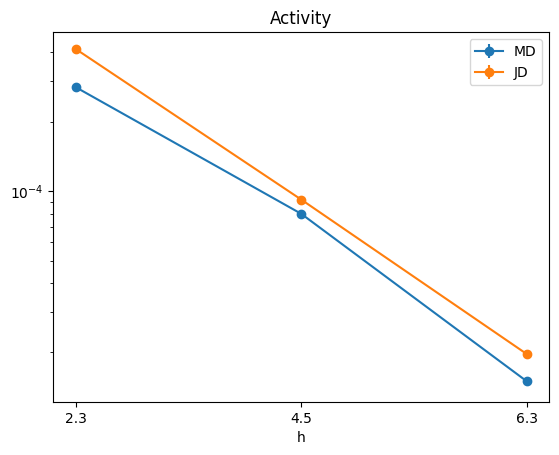

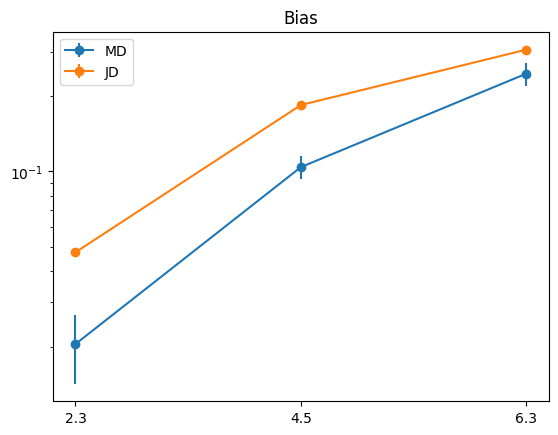

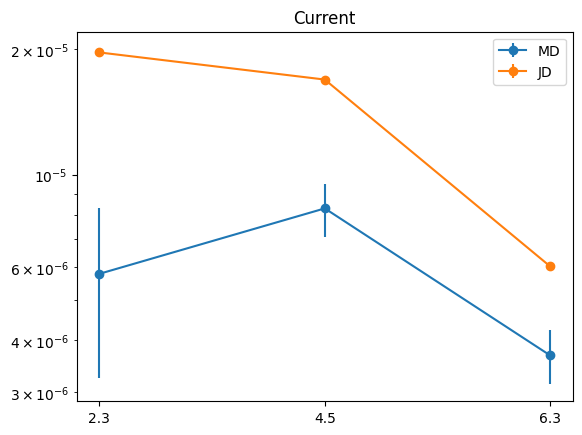

In [36]:
plt.errorbar(np.arange(len(activity_MD)),activity_MD,yerr=activity_MD_err,fmt='o-',label='MD')
plt.errorbar(np.arange(len(activity_JD)),activity_JD,yerr=activity_JD_err,fmt='o-',label='JD')
plt.legend()
plt.title("Activity")  
plt.xlabel("h")
plt.xticks(np.arange(len(activity_MD)),[np.float64(h.split('_')[-1])*2 for h in dirs])
plt.yscale('log')
plt.show()

plt.errorbar(np.arange(len(bias_MD)),bias_MD,yerr=bias_MD_err,fmt='o-',label='MD')
plt.errorbar(np.arange(len(bias_JD)),bias_JD,yerr=bias_JD_err,fmt='o-',label='JD')
plt.legend()
plt.title("Bias")
plt.xticks(np.arange(len(activity_MD)),[np.float64(h.split('_')[-1])*2 for h in dirs])
plt.yscale('log')
plt.show()

plt.errorbar(np.arange(len(current_MD)),current_MD,yerr=current_MD_err,fmt='o-',label='MD')
plt.errorbar(np.arange(len(current_JD)),current_JD,yerr=current_JD_err,fmt='o-',label='JD')
plt.legend()
plt.title("Current")
plt.xticks(np.arange(len(activity_MD)),[np.float64(h.split('_')[-1])*2 for h in dirs])
plt.yscale('log')
plt.show()